In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [2]:
data0910 = pd.read_csv("dataset/data0910.csv")
data1011 = pd.read_csv("dataset/data1011.csv")

In [3]:
data = pd.concat([data0910, data1011], axis=0)

In [4]:
data = data.drop_duplicates()

In [5]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033036 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1033036 non-null  object 
 1   StockCode    1033036 non-null  object 
 2   Description  1028761 non-null  object 
 3   Quantity     1033036 non-null  int64  
 4   InvoiceDate  1033036 non-null  object 
 5   Price        1033036 non-null  float64
 6   Customer ID  797885 non-null   float64
 7   Country      1033036 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 70.9+ MB


In [7]:
data = data.dropna()

In [8]:
data['date'] = data['InvoiceDate'].apply(lambda x : x.split()[0])
data['time'] = data['InvoiceDate'].apply(lambda x : x.split()[1])

data['hour'] = data['time'].apply(lambda x : x.split(':')[0])

data['date'] = data['date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y'))
data['year'] = data['date'].apply(lambda x : x.year)
data['month'] = data['date'].apply(lambda x : x.month)
data['day'] = data['date'].apply(lambda x : x.day)
data ['quarter'] = data['date'].apply(lambda x : x.quarter)
data['weekday'] = data['date'].apply(lambda x : x.day_name())

data['total_price'] = data['Quantity'] * data['Price']

In [9]:
data.describe()

,Quantity,Price,Customer ID,year,month,day,quarter,total_price
count,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777,2010.431108,7.411434,15.387388,2.795019,20.416465
std,191.670371,71.392549,1696.466663,0.568904,3.424495,8.658264,1.132430,313.518824
min,-80995.000000,0.000000,12346.000000,2009.000000,1.000000,1.000000,1.000000,-168469.600000
25%,2.000000,1.250000,13964.000000,2010.000000,5.000000,8.000000,2.000000,4.350000
50%,5.000000,1.950000,15228.000000,2010.000000,8.000000,15.000000,3.000000,11.700000
75%,12.000000,3.750000,16788.000000,2011.000000,10.000000,23.000000,4.000000,19.500000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,4.000000,168469.600000


### Quantity -1 인 이유 
    - 취소된 상품
    - 취소되면 'InvoiceNo'에 C가 붙게됨

In [10]:
tmp = data[data['Quantity'] < 0]

In [11]:
tmp[tmp['Invoice'].str.find("C") == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-35.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,2011-12-09,9:57,9,2011,12,9,4,Friday,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,2011-12-09,10:28,10,2011,12,9,4,Friday,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,2011-12-09,11:57,11,2011,12,9,4,Friday,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,2011-12-09,11:58,11,2011,12,9,4,Friday,-1.25


### StockCode의 규칙
 - 문자로 이루어진 stockcode는 description도 통일되어 있음

In [12]:
# 문자로만
a = data[data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]
a['StockCode'].value_counts()

POST            1983
M               1085
C2               254
D                170
ADJUST            61
BANK CHARGES      37
PADS              19
CRUK              16
DOT               16
TEST001           15
ADJUST2            3
SP1002             2
TEST002            1
Name: StockCode, dtype: int64

In [13]:
# stockcode 문자 dropna : 상품에 대한 것이 아니기 때문
data = data[~data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]

### revenue

- ARPPU(Average Revenue Per Paying User)
    - ARPPU = total revenue / user

In [23]:
total_revenue = data['total_price'].sum()
total_revenue

16358614.54

In [24]:
user = data['Customer ID'].nunique()
user

5876

In [53]:
ARPPU = total_revenue / user
ARPPU

2783.9711606535056

- Year ARPPU(Average Revenue Per Paying User)

In [62]:
YARPPU = data.groupby(['year']).sum()['total_price'] / data.groupby(['year']).nunique()['Customer ID']
YARPPU_df = YARPPU.to_frame().reset_index().rename(columns={0 : 'YARPPU'})
YARPPU_df

,year,YARPPU
0,2009,633.251596
1,2010,1890.232032
2,2011,1823.625475


<AxesSubplot:xlabel='year', ylabel='YARPPU'>

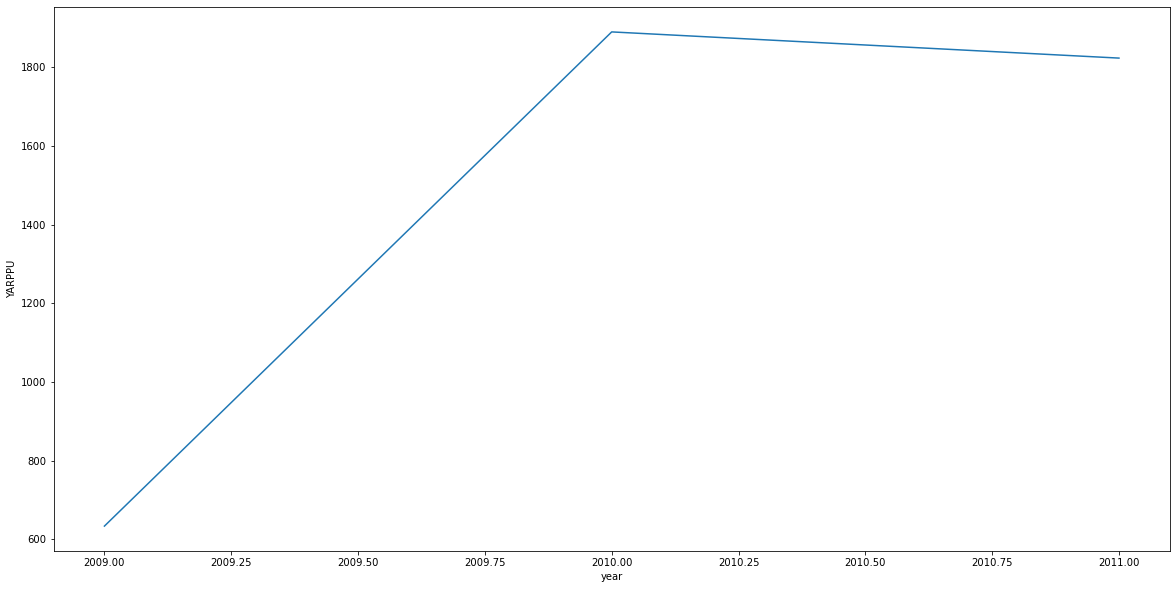

In [66]:
plt.figure(figsize=(20,10))
sns.lineplot(x=YARPPU_df['year'], y=YARPPU_df['YARPPU'])

- Monthly ARPPU(Average Revenue Per Paying User)

In [67]:
MARPPU = data.groupby(['year','month']).sum()['total_price'] / data.groupby(['year','month']).nunique()['Customer ID']
MARPPU_df = MARPPU.to_frame().reset_index().rename(columns={0 : 'MARPPU'})
MARPPU_df

,year,month,MARPPU
0,2009,12,633.251596
1,2010,1,707.513656
2,2010,2,605.118331
3,2010,3,600.057605
4,2010,4,582.744458
5,2010,5,524.786478
6,2010,6,557.911898
7,2010,7,573.661169
8,2010,8,604.629159
9,2010,9,656.142150


<AxesSubplot:xlabel='month', ylabel='MARPPU'>

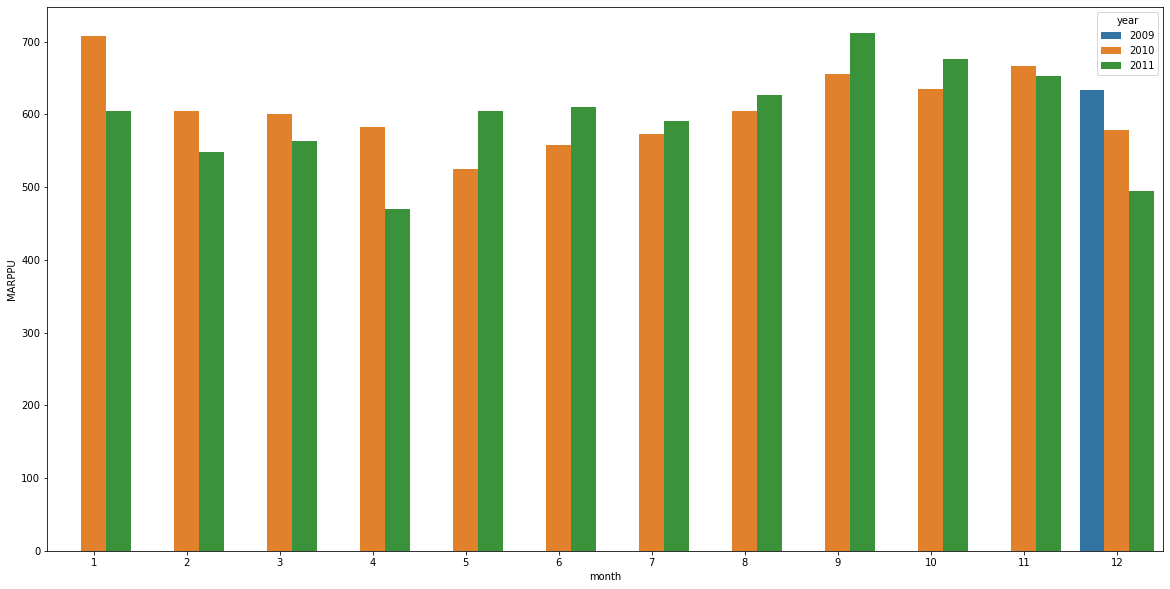

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(x=MARPPU_df['month'], y=MARPPU_df['MARPPU'], hue=MARPPU_df['year'])

- Daily ARPPU(Average Revenue Per Paying User)

In [73]:
DARPPU = data.groupby(['year','month', 'day']).sum()['total_price'] / data.groupby(['year','month', 'day']).nunique()['Customer ID']
DARPPU_df = DARPPU.to_frame().reset_index().rename(columns={0 : 'DARPU'})
DARPPU_df

,year,month,day,DARPU
0,2009,12,1,369.228772
1,2009,12,2,534.308776
2,2009,12,3,547.087845
3,2009,12,4,405.746341
4,2009,12,5,377.040385
...,...,...,...,...
599,2011,12,5,485.370526
600,2011,12,6,338.463543
601,2011,12,7,690.379899
602,2011,12,8,408.445667


In [82]:
DARPPU_df = DARPPU_df.astype({'year':"string",
                 'month':"string",
                 'day':'string'})

<AxesSubplot:xlabel='day', ylabel='DARPU'>

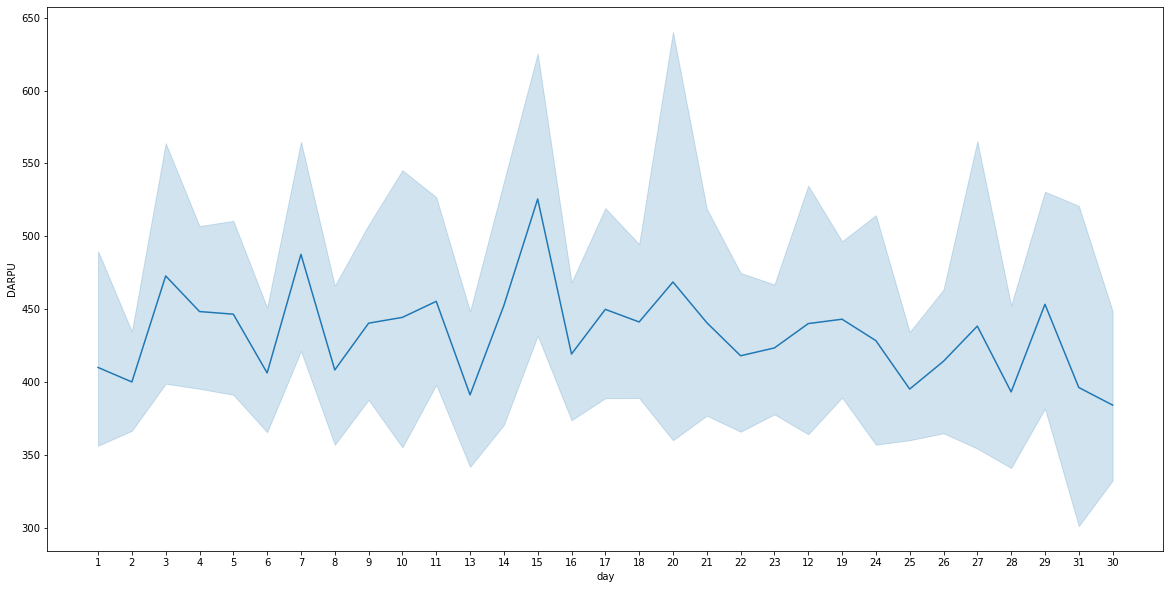

In [84]:
plt.figure(figsize=(20,10))
sns.lineplot(x=DARPPU_df['day'], y=DARPPU_df['DARPU'])

In [ ]:
# month별로 쪼개서 그래프 그리기 (subplot)